In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data=pd.read_csv(r"heart.csv")
x=data.iloc[:,0:20] #independent columns
y=data.iloc[:,-1] #target columns

In [23]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
print(data.describe())

              age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]


In [25]:
print(data.shape)

(303, 14)


In [27]:
#apply SelectKBest class to extract top 10 features
bestfeatures=SelectKBest(score_func=chi2,k=8)
fit=bestfeatures.fit(x,y)

In [28]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [29]:
#concat two dataframes for better visualization
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['values','Scores'] #naming the dataframe columns

In [30]:
featureScores

,values,Scores
0,age,23.286624
1,sex,7.576835
2,cp,62.598098
3,trestbps,14.823925
4,chol,23.936394
5,fbs,0.202934
6,restecg,2.978271
7,thalach,188.320472
8,exang,38.914377
9,oldpeak,72.644253


In [31]:
print(featureScores.nlargest(10,'Scores'))

      values      Scores
7    thalach  188.320472
13    target  138.000000
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095


In [32]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [33]:
print(model.feature_importances_)

[0.01128683 0.01909092 0.05162095 0.00732613 0.00913291 0.00415975
 0.00774644 0.01593183 0.0425676  0.03095078 0.02734842 0.04014682
 0.03753551 0.6951551 ]


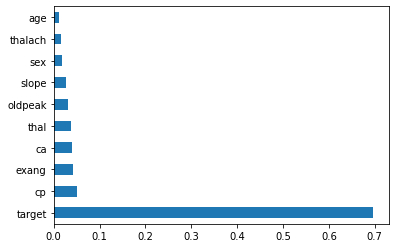

In [34]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=0
)
x_train.shape,x_test.shape


((212, 14), (91, 14))

In [37]:
x_train.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.137750,-0.047924,0.292784,0.218388,0.168401,-0.026793,-0.396797,0.037814,0.175066,-0.143330,0.278502,0.028009,-0.158168
sex,-0.137750,1.000000,-0.070390,-0.097475,-0.192253,0.027645,-0.054692,-0.067366,0.204000,0.111734,-0.078436,0.143038,0.193758,-0.342648
cp,-0.047924,-0.070390,1.000000,-0.034019,-0.022464,0.087377,0.006994,0.289873,-0.403497,-0.192547,0.116945,-0.199994,-0.184223,0.424951
trestbps,0.292784,-0.097475,-0.034019,1.000000,0.144821,0.190868,-0.080388,-0.153559,0.146582,0.197257,-0.115427,0.141982,-0.028328,-0.164402
chol,0.218388,-0.192253,-0.022464,0.144821,1.000000,0.032476,-0.084454,-0.013245,0.016811,0.055413,0.004276,0.024489,0.088717,-0.050064
fbs,0.168401,0.027645,0.087377,0.190868,0.032476,1.000000,-0.134809,-0.071406,0.034965,-0.022331,-0.107351,0.153332,-0.066588,-0.101547
restecg,-0.026793,-0.054692,0.006994,-0.080388,-0.084454,-0.134809,1.000000,0.017453,0.001052,0.014892,0.069915,-0.048096,0.059057,0.043251
thalach,-0.396797,-0.067366,0.289873,-0.153559,-0.013245,-0.071406,0.017453,1.000000,-0.361515,-0.337732,0.380330,-0.271226,-0.085401,0.419731
exang,0.037814,0.204000,-0.403497,0.146582,0.016811,0.034965,0.001052,-0.361515,1.000000,0.305472,-0.264320,0.085052,0.249634,-0.452258
oldpeak,0.175066,0.111734,-0.192547,0.197257,0.055413,-0.022331,0.014892,-0.337732,0.305472,1.000000,-0.603471,0.276924,0.161774,-0.460506


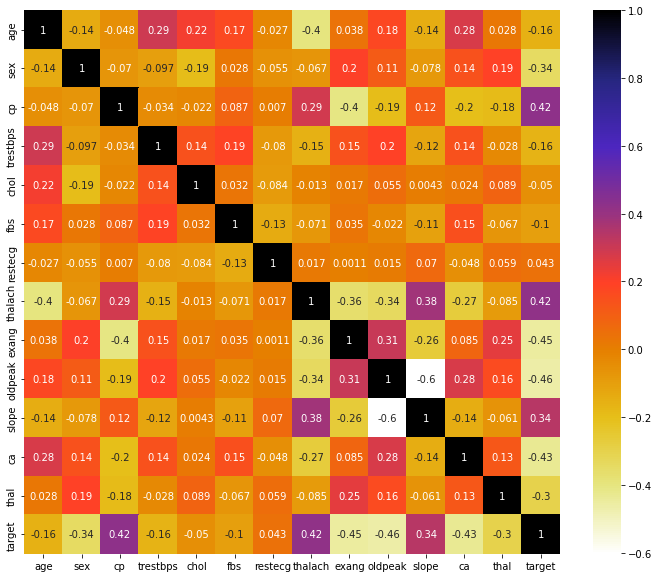

In [39]:
import seaborn as sns
#using pearson Correlation
plt.figure(figsize=(12,10))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [43]:
def correlation(dataset,threshold):
  col_corr=set() #set of all names of correlated columns
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:
          colname=corr_matrix.columns[i]
          col_corr.add(colname)
  return col_corr

In [48]:
corr_features=correlation(x_train,0.6)
len(set(corr_features))

1

In [49]:
corr_features

{'slope'}

In [51]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target
225,70,1,0,145,174,0,1,125,1,2.6,0,3,0
152,64,1,3,170,227,0,0,155,0,0.6,0,3,1
228,59,1,3,170,288,0,0,159,0,0.2,0,3,0
201,60,1,0,125,258,0,0,141,1,2.8,1,3,0
52,62,1,2,130,231,0,1,146,0,1.8,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,67,1,0,100,299,0,0,125,1,0.9,2,2,0
293,67,1,2,152,212,0,0,150,0,0.8,0,3,0
76,51,1,2,125,245,1,0,166,0,2.4,0,2,1
272,67,1,0,120,237,0,1,71,0,1.0,0,2,0


# New Section